# 머신 러닝

### 문제 1. 자전거 대여 수요(count) 예측

#### 주요 Feature 설명
***
- datatime : 날짜

- season : 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울

- holiday : 1 = 주말 및 휴일, 0 = 평일

- workingday: 1 = 주중, 0 = 주말 및 휴일

- weather : 1 = 맑음, 약간 구름 낀 흐림, 2 = 안개, 안개 + 흐림, 3 = 가벼운 눈, 가벼운 비 + 천둥, 4 = 심한 눈/비, 천둥/번개

- temp : 온도(섭씨)

- atem : 체감 온도(섭씨)

- humidity : 상대 습도

- windspeed : 풍속

- casual : 미등록 사용자 대여수

- registered : 등록된 사용자 대여수

- count : 대여 횟수(casual + registered)
***

### 1-1) Train 데이터셋을 이용하여 탐색적 데이터 분석을 시행 하고, 시각화와 함께 그 결과에 대해 논하시오

### 1-2) Train 데이터 셋을 8:2 비율로 데이터를 분할하고, 전처리를 수행하시오 

### 1-3) Ridge 회귀분석을 수행하는데, 0~1까지 0.1간격으로 alpha를 조절하여 만든 모델중 ${R}^2$ 최적인 모델에 대해 1-2)에서 분할된 test set으로 예측한 값들에 대해 ${R}^2$와 RMSE를 구하시오.

### 1-4) 마찬가지로 Lasso 회귀분석을 수행하고, 0~1까지 0.1간격으로 alpha를 조절하여 만든 모델중 ${R}^2$ 최적인 모델에 대해 1-2)에서 분할된 test set으로 예측한 값들에 대해 ${R}^2$와 RMSE를 구하시오

### 1-5) 3가지 회귀 트리 모델을 선택하여 모형 학습 및 예측/변수 중요도를 시각화를 하시오        

****
### 데이터 구조 확인

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

bike_df = pd.read_csv('./bike_train.csv')


In [2]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
bike_df.describe(include='object')

,datetime
count,10886
unique,10886
top,2011-03-18 07:00:00
freq,1


In [5]:
bike_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
pd.to_datetime(bike_df['datetime'])

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

### Insight
- 10886개의 행을 가지고, 12개의 열을 가지는 데이터
- 1개의 날짜형 데이터와 11개의 수치형 데이터가 존재한다.
- datetime 날짜형 피처는 2011년01월01일 부터 2012년 12월 19일까지 1시간 단위로 수집한 데이터 이다.
- 결측치는 존재 하지 않는다.

In [7]:
bike_df.agg(['skew','kurtosis']).T

,skew,kurtosis
season,-0.007076,-1.355661
holiday,5.660517,30.046975
workingday,-0.776163,-1.397828
weather,1.243484,0.395533
temp,0.003691,-0.914530
atemp,-0.102560,-0.850076
humidity,-0.086335,-0.759818
windspeed,0.588767,0.630133
casual,2.495748,7.551629
registered,1.524805,2.626081


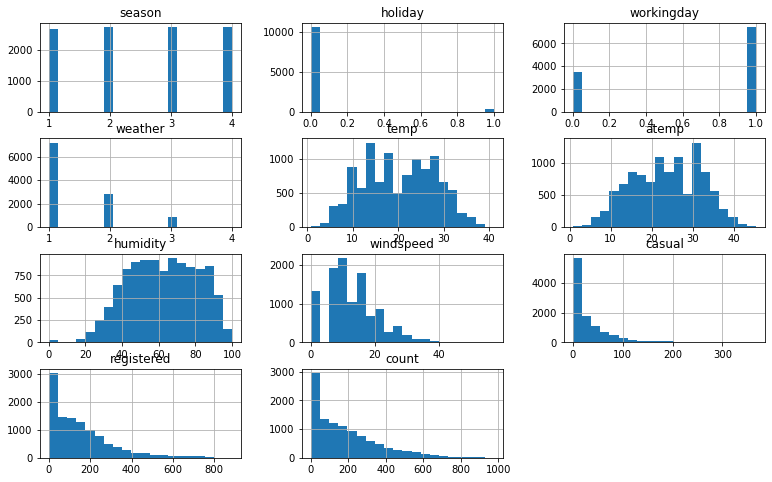

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [13, 8]
bike_df.hist(grid=True, bins=20)
plt.show()

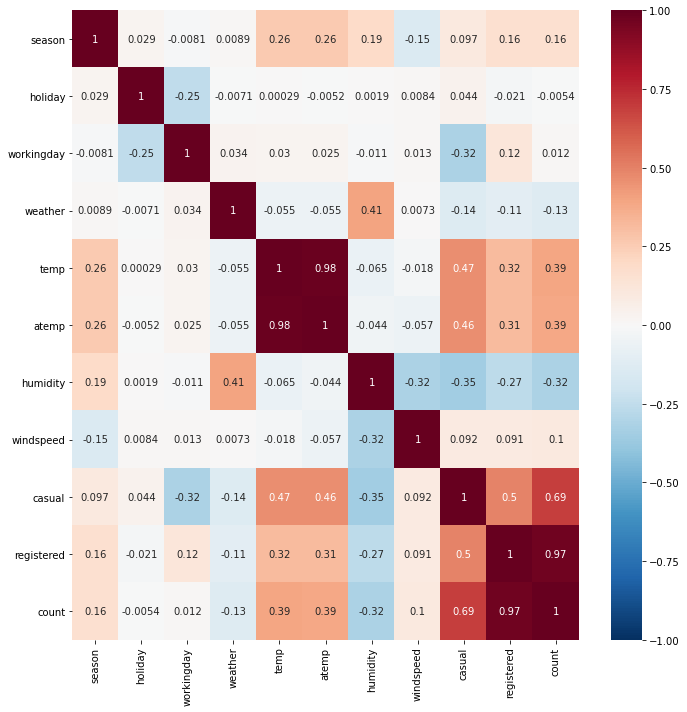

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(bike_df.corr(method='pearson'), annot=True, cmap = 'RdBu_r', vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

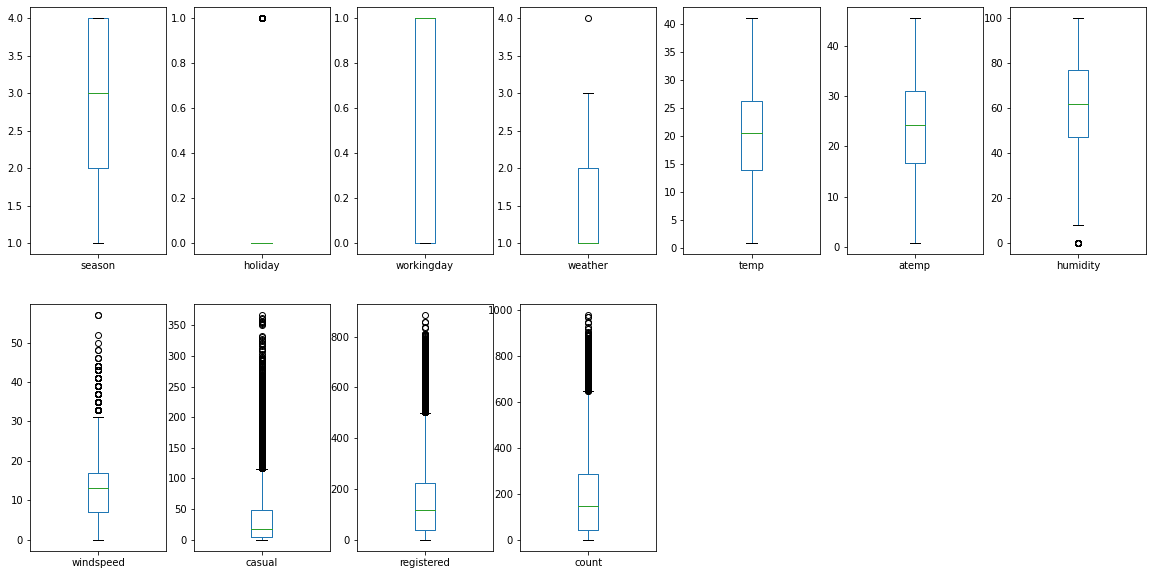

In [85]:
plt.figure(figsize=(20,10))
bike_df.plot(kind='box', subplots=True, layout=(2,len(bike_df.columns)//2+1), figsize=(20,10))
plt.show()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

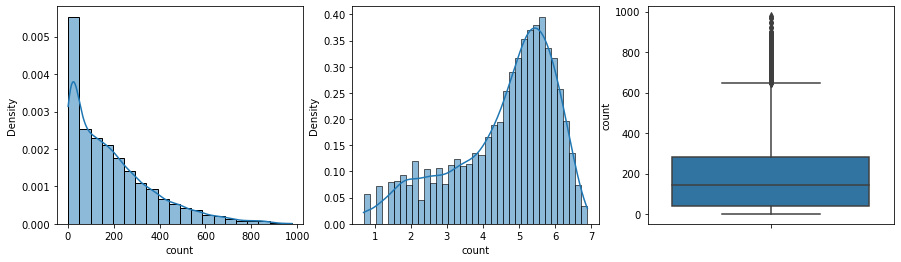

skew == 1.2420662117180776


In [9]:
display(bike_df['count'].describe())

f, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(bike_df['count'], bins=20,ax=axs[0],kde=True,stat="density")
sns.histplot(np.log1p(bike_df['count']), ax=axs[1],kde=True,stat="density")
sns.boxplot(y='count', data = bike_df, ax=axs[2])
plt.show()
print("skew ==", bike_df['count'].skew() )

In [11]:
# 문자열을 datetime 타입으로 변경. 
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [12]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    r_score = r2_score(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}, R2 Score: {3:.3F}'.format(rmsle_val, rmse_val, mae_val, r_score))

### 로그 변환, 피처 인코딩, 모델 학습/예측/평가 

In [15]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.191, RMSE: 141.973, MAE: 106.387


<ipython-input-13-4a92ff1543cb>:6: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [16]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)


      real_count  predicted_count   diff
1618         890            321.0  569.0
966          884            325.0  559.0
412          745            193.0  552.0
454          721            177.0  544.0
1003         713            171.0  542.0


<AxesSubplot:>

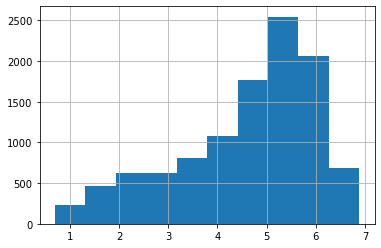

In [17]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [19]:
# 타겟 컬럼인 count 값을 log1p 로 Log 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.2, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)


RMSLE: 1.026, RMSE: 161.617, MAE: 109.159


<AxesSubplot:>

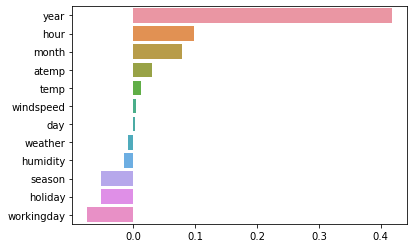

In [20]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [23]:
display(X_features['year'].value_counts())

type(X_features['year'])

2012    5464
2011    5422
Name: year, dtype: int64

pandas.core.series.Series

In [24]:
# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])



In [27]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.2, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)


### LinearRegression ###
RMSLE: 0.598, RMSE: 98.070, MAE: 63.318
### Ridge ###
RMSLE: 0.598, RMSE: 98.767, MAE: 63.758
### Lasso ###
RMSLE: 0.645, RMSE: 113.656, MAE: 72.670


<AxesSubplot:>

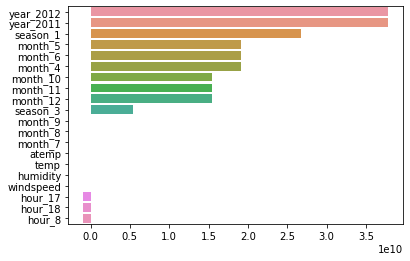

In [28]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [31]:
from sklearn.linear_model import Ridge

for alpha in range(0,11): 
    alpha = alpha / 10
    ridge = Ridge(alpha = alpha)
    get_model_predict(ridge,X_train, X_test, y_train, y_test,is_expm1=True)

### Ridge ###
RMSLE: 0.598, RMSE: 97.701, MAE: 63.170, R2 Score: 0.713
### Ridge ###
RMSLE: 0.598, RMSE: 98.075, MAE: 63.321, R2 Score: 0.711
### Ridge ###
RMSLE: 0.598, RMSE: 98.079, MAE: 63.325, R2 Score: 0.710
### Ridge ###
RMSLE: 0.598, RMSE: 98.084, MAE: 63.328, R2 Score: 0.710
### Ridge ###
RMSLE: 0.598, RMSE: 98.089, MAE: 63.332, R2 Score: 0.710
### Ridge ###
RMSLE: 0.598, RMSE: 98.093, MAE: 63.335, R2 Score: 0.710
### Ridge ###
RMSLE: 0.598, RMSE: 98.098, MAE: 63.339, R2 Score: 0.710
### Ridge ###
RMSLE: 0.598, RMSE: 98.103, MAE: 63.342, R2 Score: 0.710
### Ridge ###
RMSLE: 0.598, RMSE: 98.108, MAE: 63.346, R2 Score: 0.710
### Ridge ###
RMSLE: 0.598, RMSE: 98.113, MAE: 63.349, R2 Score: 0.710
### Ridge ###
RMSLE: 0.598, RMSE: 98.118, MAE: 63.353, R2 Score: 0.710


In [33]:
from sklearn.linear_model import Lasso

for alpha in range(0,11): 
    alpha = alpha / 10
    lasso = Lasso(alpha = alpha)
    print('alpha =>', alpha)
    get_model_predict(lasso,X_train, X_test, y_train, y_test,is_expm1=True)

alpha => 0.0


<ipython-input-27-2178a4e6cc4a>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
C:\Users\ParkHeungKi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\ParkHeungKi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1446.6590251066593, tolerance: 1.7425632721359354
  model = cd_fast.enet_coordinate_descent(


### Lasso ###
RMSLE: 0.598, RMSE: 98.070, MAE: 63.318, R2 Score: 0.711
alpha => 0.1
### Lasso ###
RMSLE: 1.240, RMSE: 175.291, MAE: 119.573, R2 Score: 0.075
alpha => 0.2
### Lasso ###
RMSLE: 1.243, RMSE: 175.844, MAE: 119.968, R2 Score: 0.069
alpha => 0.3
### Lasso ###
RMSLE: 1.244, RMSE: 176.152, MAE: 120.134, R2 Score: 0.066
alpha => 0.4
### Lasso ###
RMSLE: 1.245, RMSE: 176.513, MAE: 120.349, R2 Score: 0.062
alpha => 0.5
### Lasso ###
RMSLE: 1.246, RMSE: 176.922, MAE: 120.584, R2 Score: 0.058
alpha => 0.6
### Lasso ###
RMSLE: 1.247, RMSE: 177.310, MAE: 120.787, R2 Score: 0.054
alpha => 0.7
### Lasso ###
RMSLE: 1.249, RMSE: 177.685, MAE: 120.975, R2 Score: 0.050
alpha => 0.8
### Lasso ###
RMSLE: 1.250, RMSE: 178.093, MAE: 121.190, R2 Score: 0.045
alpha => 0.9
### Lasso ###
RMSLE: 1.251, RMSE: 178.531, MAE: 121.423, R2 Score: 0.041
alpha => 1.0
### Lasso ###
RMSLE: 1.253, RMSE: 178.998, MAE: 121.694, R2 Score: 0.036


In [42]:
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features_ohe.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

### RandomForestRegressor ###
RMSLE: 0.354, RMSE: 49.585, MAE: 30.279, R2 Score: 0.926


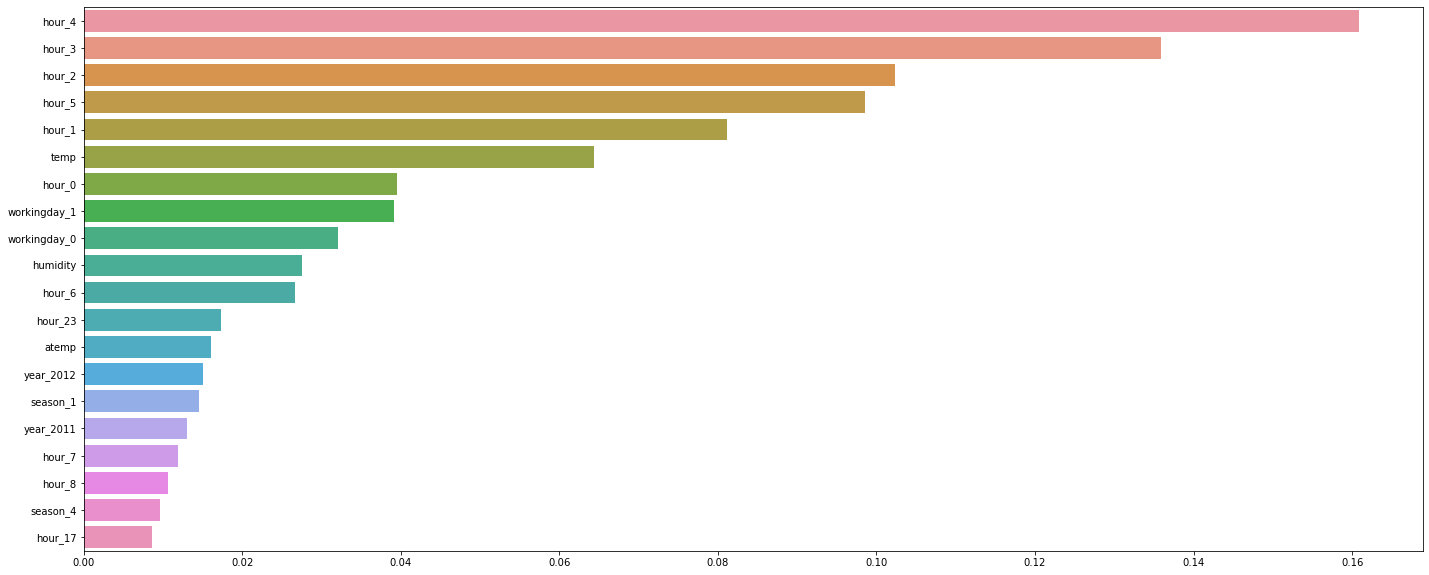

### GradientBoostingRegressor ###
RMSLE: 0.342, RMSE: 55.048, MAE: 34.096, R2 Score: 0.909


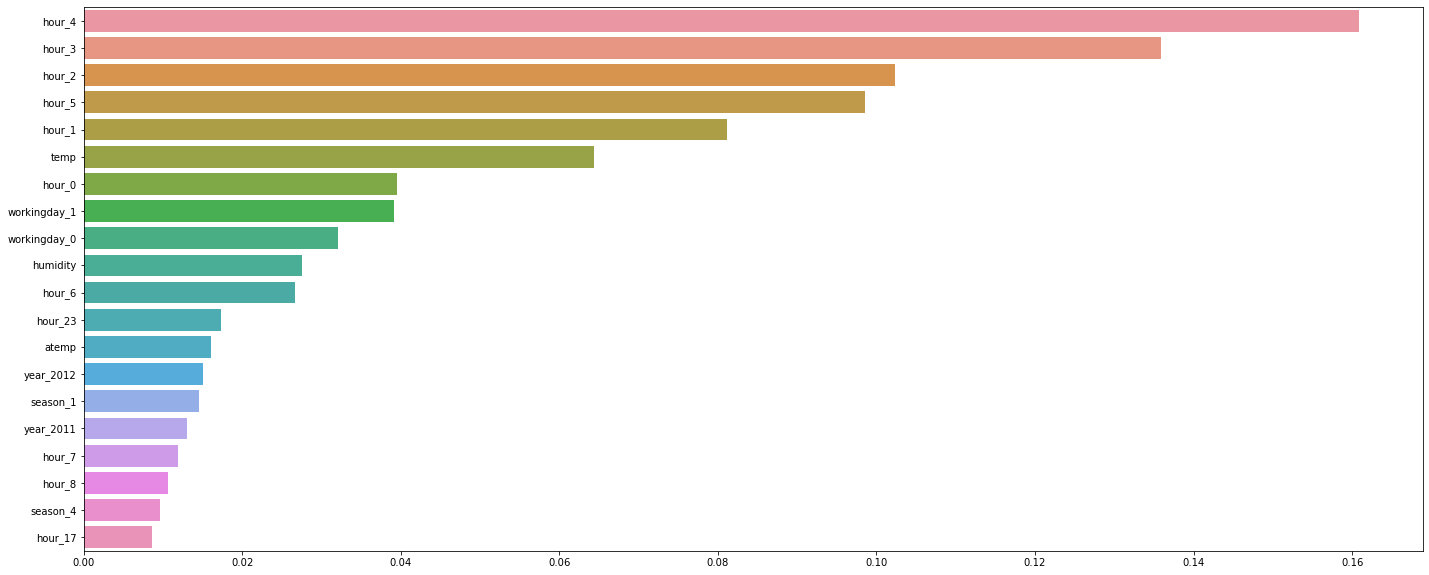

### XGBRegressor ###
RMSLE: 0.342, RMSE: 53.270, MAE: 31.367, R2 Score: 0.915


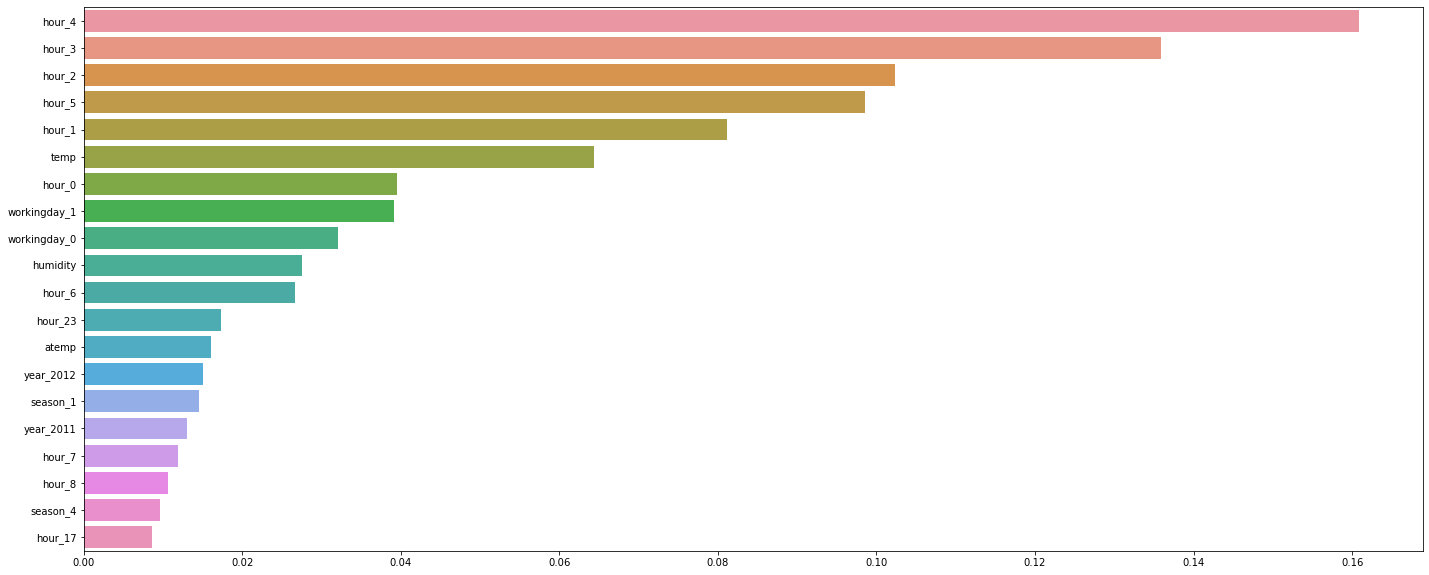

### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.777, MAE: 28.599, R2 Score: 0.931


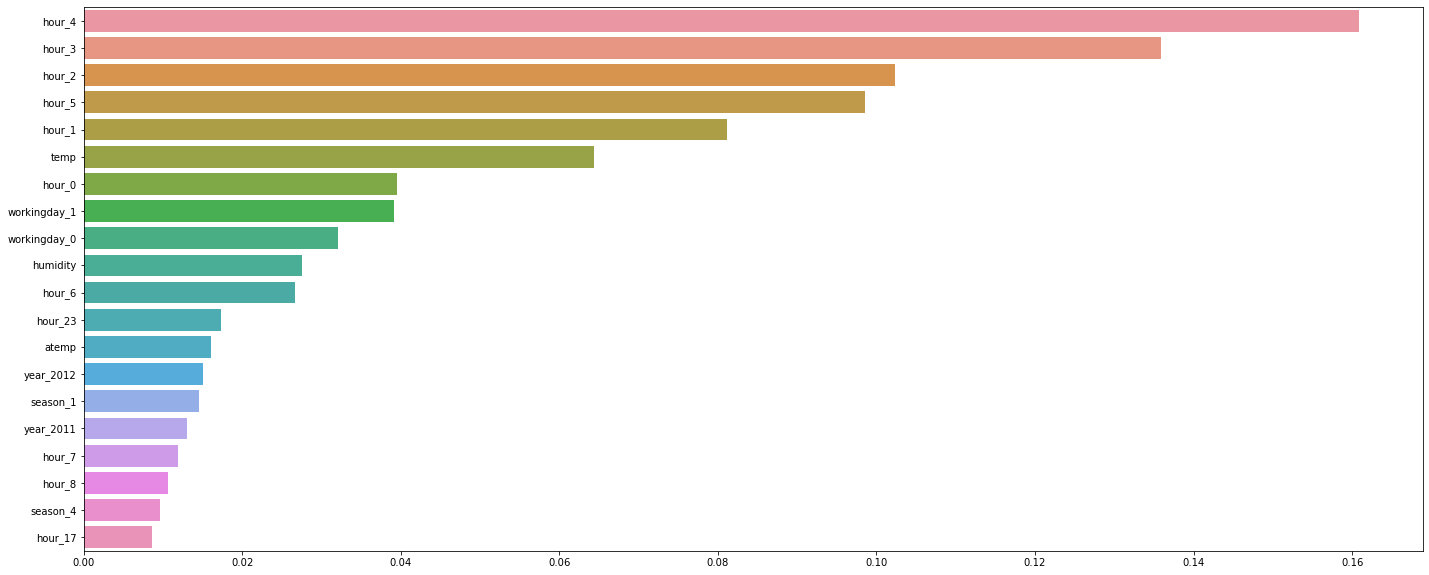

In [49]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)
    ftr_top20 = get_top_features(rf_reg)
    fig, axs = plt.subplots(figsize=(24,10))
    sns.barplot(x=ftr_top20.values, y=ftr_top20.index ,ax=axs)
    plt.show()
    

# 통계 분석

## 문제 2.삼성전자 종가(Close) 예측

### 주요 Feature 설명
***
Close: 종가 - 주식 시장이 마감했을 때의 가격

Open: 시가 - 주식 시장이 시작했을 때의 가격

High: 최고가

Low: 최저가

Volume: 거래량

Change: 증감률 - 어제 종가 대비 오늘 종가의 증감률
***

### 2-1) EDA 및 전처리를 수행 하시오

### 2-2) 데이터 셋을 7:3의 비율로 데이터를 분할 하고 , 시계열 분석을 수행하시오

### 2-3) 잔차 검정을 수행하고, 테스트 데이터를 예측 및 시각화를 수행 하시오

### 2-4) 테스트 데이터에 대한 평가지표 MAPE 값을 도출 하시오

<font size="5">$MAPE = \frac{100\%}{n}\sum_{t=1}^{n}\frac{\vert F_{t}-A_{t}\vert}{\vert A_{t} \vert}$</font>


### 2-5) 모형 성능 개선을 하기 위해서 전략 및 구현을 하시오(ex: refresh)
### *******************************************************************************************************


### 2-1) EDA 및 전처리를 수행 하시오

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import ndiffs
import pmdarima as pm
import itertools
from statsmodels.tsa.arima.model import ARIMA

ss = pd.read_csv('./samsung.csv')
ss['Date'] = pd.to_datetime(ss['Date'])
ss = ss.set_index('Date')
# ss.index = pd.DatetimeIndex(ss.index,freq='BDay')
ss.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


#### 1.데이터에 EDA, 주기도 확인

In [10]:
ss.info()
print(ss.index)

ss.asfreq('D')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 413 entries, 2020-01-02 to 2021-08-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    413 non-null    int64  
 1   High    413 non-null    int64  
 2   Low     413 non-null    int64  
 3   Close   413 non-null    int64  
 4   Volume  413 non-null    int64  
 5   Change  413 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 22.6 KB
DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-30'],
              dtype='datetime64[ns]', name='Date', length=413, freq=None)


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,12993228.0,-0.010753
2020-01-03,56000.0,56600.0,54900.0,55500.0,15422255.0,0.005435
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,54900.0,55600.0,54600.0,55500.0,10278951.0,0.000000
...,...,...,...,...,...,...
2021-08-26,76100.0,76200.0,74600.0,74600.0,16671494.0,-0.014531
2021-08-27,74300.0,75000.0,73800.0,74300.0,15172748.0,-0.004021
2021-08-28,NaN,NaN,NaN,NaN,NaN,NaN


#### Insight

2020-01-02일 부터 2021-08-30 까지 데이터 이며, 주식 데이터이기 때문에 토, 일 , 휴일에는 데이터가 존재 하지 않는다.

#### 2.데이터 시각화

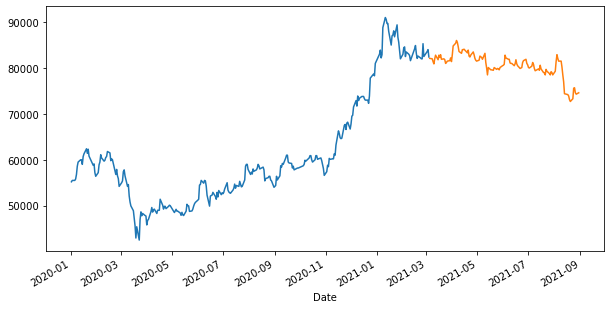

In [11]:
y_train = ss['Close'][:int(0.7*len(ss))]
y_test = ss['Close'][int(0.7*len(ss)):]
y_train.plot(figsize=(10, 5))
y_test.plot()
plt.show()

#### 3.정상성 확인/ 차분

여기에서는 pmdarima 패키지에 ndiffs를 사용한다.  
그리고 직접구현한 계수찾는거와, auto_arima를 사용한다.


In [70]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


In [13]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

def my_auto_arima(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    d = order[1]
    for p in range(order[0]):        
        for q in range(order[2]):
            model = ARIMA(data, order=(p,d,q))
            try:
                model_fit = model.fit()
                c_order = f'p{p} d{d} q{q}'
                aic = model_fit.aic
                bic = model_fit.bic
                order_list.append(c_order)
                aic_list.append(aic)
                bic_list.append(bic)
            except:
                pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [14]:
auto_df = my_auto_arima(y_train, [3,3,3])
auto_df.sort_values(by = 'AIC').head(10)

,order,AIC
8,p2 d3 q2,5021.568024
5,p1 d3 q2,5027.649172
2,p0 d3 q2,5027.726371
7,p2 d3 q1,5041.762118
4,p1 d3 q1,5048.185883
1,p0 d3 q1,5108.198244
6,p2 d3 q0,5235.940331
3,p1 d3 q0,5315.323588
0,p0 d3 q0,5410.196611


In [15]:
model = pm.auto_arima(y = y_train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4934.821, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4936.780, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4936.799, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4934.428, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4938.798, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.115 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  289
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2466.214
Date:                Wed, 25 May 2022   AIC                           4934.428
Time:                        22:34:44   BIC                           4938.091
Sample:                             0   HQIC                          4935.896
                                - 289                                       



<font size="5">auto_arima 파라미터   </font> 

- y: array 형태의 시계열 자료  
- d (기본값 = none): 차분의 차수, 이를 지정하지 않으면 실행 기간이 매우 길어질 수 있음  
- start_p (기본값 = 2), max_p (기본값 = 5): AR(p)를 찾을 범위 (start_p에서 max_p까지 찾는다!)  
- start_q (기본값 = 2), max_q (기본값 = 5): AR(q)를 찾을 범위 (start_q에서 max_q까지 찾는다!)  
- m (기본값 = 1): 계절적 차분이 필요할 때 쓸 수 있는 모수로 m=4이면 분기별, m=12면 월별, m=1이면 계절적 특징을 띠지 않는 데이터를 의미한다. m=1이면 자동적으로 seasonal 에 대한 옵션은 False로 지정된다.  
- seasonal (기본값 = True): 계절성 ARIMA 모형을 적합할지의 여부  
- stepwise (기본값 = True): 최적의 모수를 찾기 위해 쓰는 힌드만 - 칸다카르 알고리즘을 사용할지의 여부, False면 모든 모수 조합으로 모형을 적합한다.  
- trace (기본값 = False): stepwise로 모델을 적합할 때마다 결과를 프린트하고 싶을 때 사용한다.  

#### Insight

모형 결과 1차 차분 하였을 경우 $(\epsilon t∼N(0,\sigma^2))$ 임을 의미 하고 결국 아래 식처럼 임의 보행 모형 (Random Walk Model)을 따른다는 것을 알 수 있습니다.  
<font size="5" color="red">
$y_t - y_{t-1} = \epsilon t $  
$y_t  = y_{t-1} + \epsilon t $  
</font>

#### 4. 잔차 검정한다

In [72]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

model_2 = ARIMA(y_train,order=(0,1,0)).fit()
print(model_2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  289
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2466.214
Date:                Tue, 24 May 2022   AIC                           4934.428
Time:                        22:11:51   BIC                           4938.091
Sample:                             0   HQIC                          4935.896
                                - 289                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.599e+06   9.63e+04     16.608      0.000    1.41e+06    1.79e+06
Ljung-Box (Q):                       36.13   Jarque-Bera (JB):                46.72
Prob(Q):                              0.65   Pr

Ljung-Box (Q) / Heteroskedasticity (H) / Jarque-Bera (JB)에 대한 부분은 모두 잔차에 대한 검정 통계량들입니다.  
 - Ljung-Box (Q) 융-박스 검정 통계량는 잔차가 백색잡음인지 검정한 통계량입니다.  
 Prob (Q) 값을 보면 0.65이므로 유의수준 0.05에서 귀무가설을 기각하지 못합니다. Ljung-Box (Q) 통계량의 귀무가설은 “잔차(residual)가 백색잡음(white noise) 시계열을 따른다”이므로, 위 결과를 통해 시계열 모형이 잘 적합되었고 남은 잔차는 더이상 자기상관을 가지지 않는 백색 잡음임을 확인할 수 있습니다.
 - Jarque-Bera (JB) 자크-베라 검정 통계량은 잔차가 정규성을 띠는지 검정한 통계량입니다.  
 Prob(JB)값을 보면 0.00으로 유의 수준 0.05에서 귀무가설을 기각합니다. Jarque-Bera (JB) 통계량의 귀무가설은 “잔차가 정규성을 만족한다”이므로, 위 결과를 통해 “잔차가 정규성을 따르지 않음”을 확인할 수 있습니다.  
 - Heteroskedasticity (H) 이분산성 검정 통계량은 잔차가 이분산을 띠지 않는지 검정한 통계량입니다.
 
 - 또한, 잔차가 정규분포를 따른다면, 경험적으로  
비대칭도 (Skew)는 0에 가까워야 하고
첨도 (Kurtosis)는 3에 가까워야 합니다.

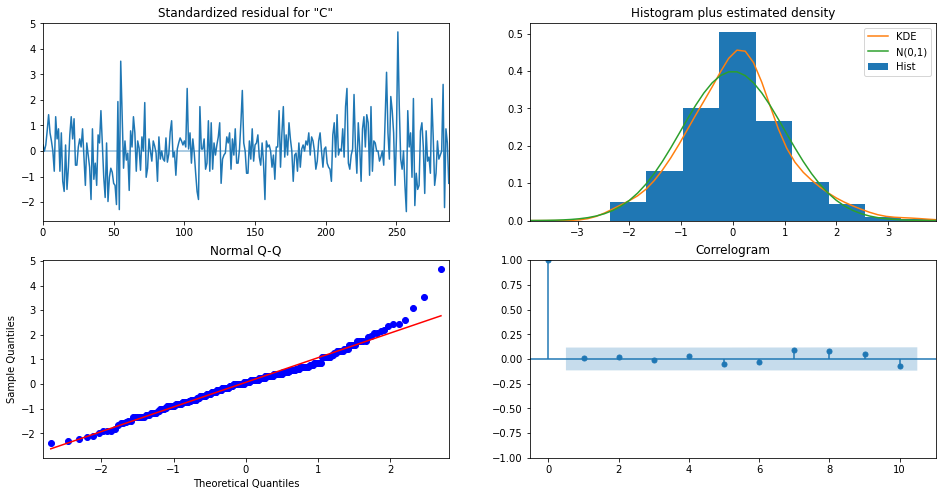

In [70]:
model_2.plot_diagnostics(figsize=(16, 8))
plt.show()

잔차가 백색 잡음을 따르는지 보여주는 플랏은 Standardized residual과 Correlogram 그림입니다.
- Standardized residual은 잔차를 그냥 시계열로 그린 것입니다. 백색 잡음 답게 잔차의 시계열이 평균 0을 중심으로 무작위하게 움직이는 것을 볼 수 있습니다.
- Correlogram은 잔차에 대한 ACF입니다. ACF도 어느 정도 허용 범위 안에 위치하여 자기상관이 없음을 알 수 있습니다.

잔차가 정규성을 만족하는지 보여주는 플랏은 Histogram plus estimated density와 Normal Q-Q 그림입니다.
- Histogram plus estimated density는 잔차의 히스토그램을 그려 정규 분포 N(0,1)과 밀도를 추정한 그래프를 같이 겹쳐서 보여줍니다. 위 비대칭도와 첨도에서 확인하셨던 것처럼 정규분포와 비슷하게 대칭적이지만, 첨도가 더 뾰족하게 솟아오른 것을 알 수 있습니다.
- Normal Q-Q그래프는 Q-Q 플랏으로 정규성을 만족한다면 빨간 일직선 위에 점들이 분포해야 합니다. 그러나, 양 끝 쪽에서 빨간 선을 약간 벗어나는 듯한 모습을 보입니다.

결과적으로 저희가 적합한 ARIMA (0,1,0)으로 남은 잔차는 백색 잡음이지만, 정규성은 따르지 않는다 볼 수 있습니다.


#### 5. 모형 refresh 및 예측

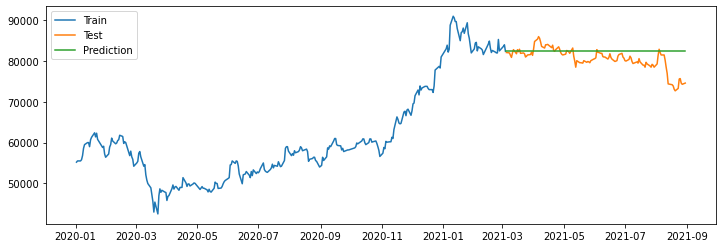

In [73]:
# 테스트 데이터 개수만큼 예측
y_predict = model_2.forecast(len(y_test)) 
y_predict = pd.DataFrame(y_predict.values,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

ARIMA 모형은 ARIMA (0,1,0) 모형으로, 1차 차분 시 백색 잡음인 모형입니다. 결국 아래 식처럼 상수항이 없는 임의 보행 모형 (Random Walk Model)을 따른다는 것을 알 수 있습니다  
$y_t - y_{t-1} = \epsilon t $  
$y_t  = y_{t-1} + \epsilon t, \epsilon t ~ N(0,\sigma^2)  $    
그런데, 예측을 할 때 innovation term인 ϵt의 기댓값이 0이기 때문에 이 부분을 0으로 대체하게 됩니다. 따라서, 예측치들은 결국 가장 마지막 관측치가 되는 것이죠. 결국, ϵt 부분은 0으로 대체되고, 임의 보행 모형에서는 예측치들이 가장 마지막 관측치로 동일하기 때문에 일직선을 얻게 되는 것입니다.  

데이터에 특정한 주기나 추세가 없기 때문에, AIC로 모형을 최적화를 하는 과정에서 의미있는 자기 상관 (AR)이나 이동 평균 (MA)를 찾기 어려웠기 때문입니다. 따라서, 최선책으로 임의 보행 모형 어제의 값이 오늘의 값을 가장 잘 설명한다는 모형이 데이터를 가장 잘 설명한다는 결론을 내립니다. 결과적으로, 데이터에서 어떠한 구조를 보기 어렵기 때문에, 가장 마지막 관측치가 가장 좋은 예측치다라 말하고 있는 것입니다.

<font size="5">테스트 데이터를 “관측”할 때마다 모형을 업데이트해주는 REFRESH 전략</font>

용어 부터 확인해 보자  
static forecasts : train 실제 값을 가지고 다음 값을 예측   
dynamic forecasts : 예측값을 가지고 다음 값을 예측  

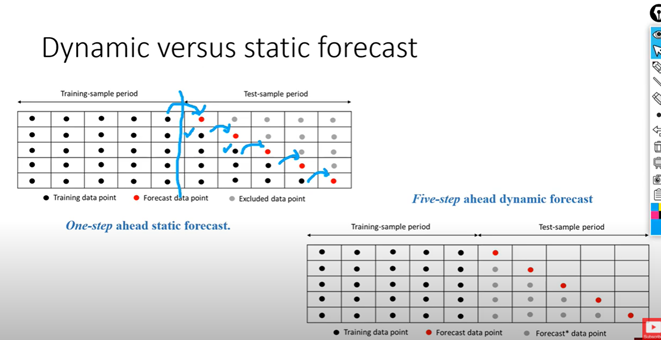


In [6]:
history = y_train.tolist()
predictions = []
# model_res = ''
for new_ob  in y_test.values:    
    model_fit = ARIMA(history,order=(0,1,0)).fit()    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(new_ob) 
     
#     model_res = model_fit
    

In [7]:
pred_df= pd.DataFrame({"test": y_test, "pred": predictions})
pred_df

,test,pred
Date,,
2021-03-05,82100,82400.0
2021-03-08,82000,82100.0
2021-03-09,81400,82000.0
2021-03-10,80900,81400.0
2021-03-11,82000,80900.0
...,...,...
2021-08-24,75600,73300.0
2021-08-25,75700,75600.0
2021-08-26,74600,75700.0


In [117]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  412
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3480.773
Date:                Wed, 09 Feb 2022   AIC                           6963.545
Time:                        16:34:27   BIC                           6967.564
Sample:                             0   HQIC                          6965.135
                                - 412                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.326e+06   6.37e+04     20.811      0.000     1.2e+06    1.45e+06
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                99.20
Prob(Q):                              0.47   Pr

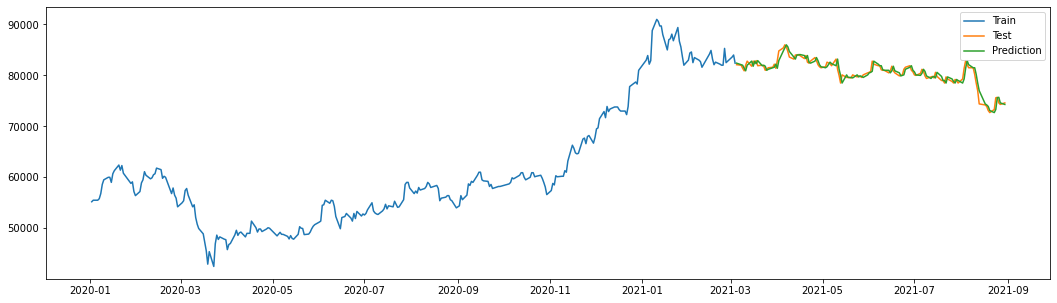

In [8]:
# 그래프
fig, axes = plt.subplots(1, 1, figsize=(18, 5))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(pred_df['pred'], label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

더 자세히 보면, 테스트 값을 하루 미루면 예측값이 되어야 하는데요. 그렇다고 보기엔 초록색 동그라미 부분이 평행 이동이 아닌 것 같은 느낌을 지울 수 없었습니다. 그 이유는 실상 주식 데이터는 주말에 없기 때문에 3일 뒤에 예측될 수도 있어 (금요일 데이터 -> 월요일에 반영) 그런 것이었고, 주중에서는 딱 1일 뒤 데이터가 예측값으로 잘 들어가 있었습니다.

<font size="5">모형 평가</font>
여기서는 MAPE (Mean Absolute Percentage Error) 지표 활용  
$F_t$ 를 예측값, $A_t$를 실제 테스트 데이터 값이라 할 때 MAPE는 다음과 같이  
“잔차 ($F_t−A_t$)의 크기가 실제 값 At의 크기에서 차지하는 백분율”로, 작을수록 좋습니다. 

$MAPE = \frac{100%}{n}\ \displaystyle\sum_{t=1}^{n} \frac{|F_t - A_t|}{|A_t|}\$

In [9]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, predictions):.3f}")

MAPE: 0.792


위와 같이 잔차가 실제값의 0.792% 를 차지할 정도로 모형이 잘 적합되었음을 알 수 있습니다

## 문제 3. 3개의 모델의 분류 결과 값에 대하여 분류 정확도 간에 차이가 있는지 검정 하시오

귀무 가설 : 3개의 모델의 분류 결과 정확도 간에 차이가 없다.

연구 가설 : 3개의 모델의 분류 결과 정확도 간에 차이가 있다

In [17]:
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0])
y_model_1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0])
y_model_2 = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0])
y_model_3 = np.array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1])

data = pd.DataFrame({'y_true':y_true, 'model_1':y_model_1, 
                         'model_2':y_model_2, 'model_3':y_model_3 })

data

,y_true,model_1,model_2,model_3
0,0,1,1,1
1,0,1,1,1
2,0,1,1,1
3,0,1,1,0
4,0,1,1,0
...,...,...,...,...
95,0,0,0,0
96,0,0,0,0
97,0,0,0,0
98,0,0,0,1


In [21]:
from sklearn.metrics import accuracy_score
print('model_1 accuracy ' , accuracy_score(y_true, y_model_1))
print('model_2 accuracy ' , accuracy_score(y_true, y_model_2))
print('model_2 accuracy ' , accuracy_score(y_true, y_model_3))


model_1 accuracy  0.84
model_2 accuracy  0.92
model_2 accuracy  0.92


In [18]:
from mlxtend.evaluate import cochrans_q
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar

q, p_value = cochrans_q(y_true, 
                        y_model_1, 
                        y_model_2, 
                        y_model_3)

print('Q: %.3f' % q)
print('p-value: %.3f' % p_value)

Q: 7.529
p-value: 0.023


<font size="5"> Insight </font>

p-value: 0.023 이기 때문에 유의 수준 5% 에서 귀무가설을 기각 

즉 3개의 모델의 분류 결과 정확도 간에 차이가 있다

## 문제4. 상관관계 분석

### 상관계수의 추정

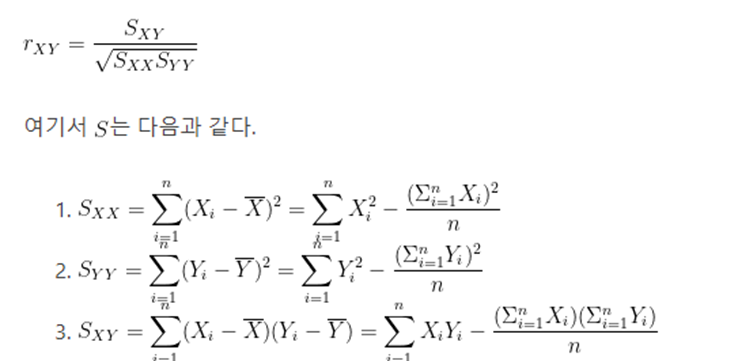

### 상관관계 유무에 대한 검정

두 변수 간에 상관관계가 있는지에 대한 검정에서 귀무가설은 "두 변수 간에 상관관계가 없다"로 설정된다. 즉, 귀무가설 $H_0:~\rho_{XY} = 0$을 검정하는 것이다. 검정통계량은 다음과 같이 정의되며 X와  Y가 정규분포를 따르는 경우 귀무가설 하에서 자유도 (n-2)인 t-분포를 따른다.

<font size="5">$T_0 = r_{XY} \sqrt{\frac{n-2}{1-r^2_{XY}}} \sim t(n-2) | H_0$</font>

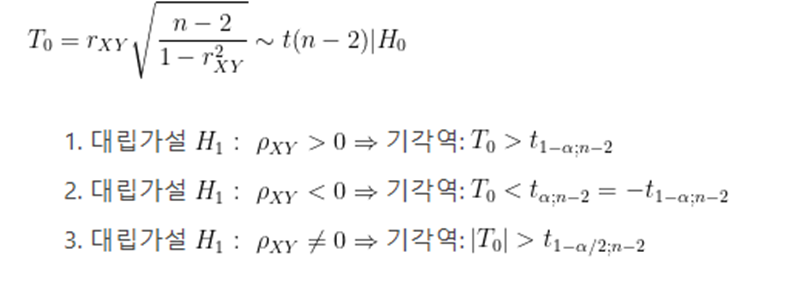

### 상관계수에 대한 검정

두 변수 간의 상관계수가 특정한 값과 같은지 판단해야 하는 경우가 있다.

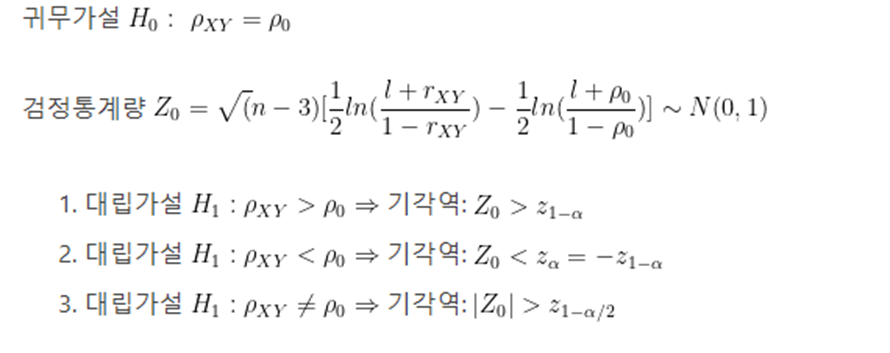

### 한 수출기업에서 원-달러 환율과 수출액 간의 관계를 분석하기 위하여 한 지점의 최근 10개월간의 데이터를 수집한 결과가 다음과 같다. (유의수준 5%)

아래 데이터는 4-1), 4-2)에 사용 되는 데이터

|월|1|2|3|4|5|6|7|8|9|10|
|---|---|---|---|---|---|---|---|---|---|---|
|환율|1095|1110|1086|1074|1098|1105|1163|1124|1088|1064|
|수출액|53.655|57.72|52.128|52.626|54.9|56.355|58.15|57.324|53.312|51.072|


#### 문제 4-1) 환율과 수출액 간에 상관관계가 있는지 검정 하시오 

귀무가설 : 환율과 수출액간에 상관관계가 없다

연구가설 : 환율과 수출액간에 상관관계가 있다.

In [3]:
import numpy as np
x = np.array([1095,1110,1086,1074,1098,1105,1163,1124,1088,1064])
y = np.array([53.655,57.72,52.128,52.626,54.9,56.355,58.15,57.324,53.312,51.072])

from scipy import stats
stats.pearsonr(x,y)

(0.8811918008908426, 0.0007534638552336352)

In [13]:
Sxx =  np.sum(x**2) - np.sum(x)**2 / len(x)
Syy =  np.sum(y**2) - np.sum(y)**2 / len(y)
Sxy = np.sum(x*y) - (np.sum(x) * np.sum(y) / len(x))

Rxy = Sxy / np.sqrt(Sxx * Syy)
print('직접 계산한 상관계수 ===> ' , Rxy)

직접 계산한 상관계수 ===>  0.8811918008908807


In [32]:
T0 = Rxy * np.sqrt( (len(x) - 2) / (1 - Rxy**2))
alpha = 0.05 
t_critical = stats.t.ppf(1-alpha / 2, df = len(x) - 2)
pvalue = (1- stats.t.cdf(T0 , len(x) - 2))*2
print('상관분석 검정 통계량 ==>', T0, ' t 분포 임계치  ===> ' , t_critical, ' Pvalue ===> ', pvalue)


상관분석 검정 통계량 ==> 5.272003574032295  t 분포 임계치  ===>  2.3060041350333704  Pvalue ===>  0.0007534638552326722


<font size="5"> 결과 </font>

상관계수가 0.88 이기 때문에 환율과 수출액간에 상관관계가 높다는 것을 알수 있고, 

상관 관계 유무에 대한 검정을 하였을 경우에도 pvalue가 유의 수준 5% 보다 작기 때문에 귀무가설을 기각 즉 상관관계가 있다는것을 알 수 있다

#### 문제 4-2) 환율과 수출액간의 상관계수가 0.9라고 할수 있는지 검정 하시오

귀무가설 $ H_0:~ \rho_{XY} = 0.9$

연구가설 $ H_0:~ \rho_{XY} \ne 0.9$

***

In [41]:
n = len(x)
alpha = 0.05 
Z0 = np.sqrt(n -3)* (1/2 * np.log((1 + Rxy) / (1-Rxy)) - 1/2 * np.log((1+ 0.9) / (1-0.9)))

Z_critical = stats.norm.ppf(1- alpha / 2)

P_value = stats.norm.sf(abs(Z0)) * 2 # 양측 검정이기 때문에

print('상관계수에 대한 검정 통계량 ==>', Z0, ' Z분포 임계값  ===> ' , Z_critical, ' Pvalue ===> ', P_value)

상관계수에 대한 검정 통계량 ==> -0.24114516202682468  Z분포 임계값  ===>  1.959963984540054  Pvalue ===>  0.8094426111265506


<font size="5"> 결과 </font>

Pvalue 가 0.80 이고 유의 수준 5% 보다 크기 때문에 귀무가설을 채택

즉  환율과 수출액간의 상관계수가 0.9와 다르다는 충분한 증거가 없다 

#### 문제 4-3) 어느 공장에서 작업자의 “결근횟수”와 “생산량”이 서로 상관관계가 있는지를 파악하는 중이다. 그래서 과거의 데이터를 분석해서 총 15개의 표본을 뽑았더니, 상관계수는 -0.45가 나왔다. 그럼 “결근횟수”와 “생산량”은 서로 상관관계가 있다고 할 수 있는지 유의수준 5%에서 검정하시오.

상관계수가 -0.45이므로 수치가 애매 하다. 그래서 상관계수만으로 상관관계를 파악하기 보다는 추가적으로 가설검정을 통해서 상관관계를 파악한다.

귀무가설 : 결근 횟수와 생산량이 상관관계가 없다

연구가설 : 결근 횟수와 생산량이 상관관계가 있다

In [46]:
Rxy = -0.45
n = 15
T0 = Rxy * np.sqrt( (n - 2) / (1 - Rxy**2))
alpha = 0.05 
t_critical = stats.t.ppf(1-alpha / 2, df = n - 2)
pvalue = (1- stats.t.cdf(abs(T0) , n - 2))*2
print('상관분석 검정 통계량 ==>', T0, ' t 분포 임계치  ===> ' , t_critical, ' Pvalue ===> ', pvalue)

상관분석 검정 통계량 ==> -1.8168490412996545  t 분포 임계치  ===>  2.1603686564610127  Pvalue ===>  0.09235737494812257


<font size="5"> 결과 </font>

유의수준 α=0.05인데 양측검정이므로 α/2=0.025이고 자유도는 15-2=13이다. 그래서 t분포표에서 해당하는 값을 찾으면 2.16이 나오는데, 양쪽으로 설정해야 하므로 기각역은 ±2.16이다. 

그럼 검정통계량이 “채택역”안에 위치하므로 귀무가설이 채택된다. 그래서 “결근횟수”와 “생산량”은 서로 상관관계가 없다고 할 수 있다

## 문제 5 회귀분석 (문제 4번의 환율과 수출액간의 데이터를 이용)
#### 5-1) 환율을 독립변수, 수출액을 종속변수로 놓고 추정된 회귀식 및 회귀 모형을 검정 하시오

In [49]:
import pandas as pd 
x = np.array([1095,1110,1086,1074,1098,1105,1163,1124,1088,1064])
y = np.array([53.655,57.72,52.128,52.626,54.9,56.355,58.15,57.324,53.312,51.072])

data = pd.DataFrame({'x':x,'y':y})

import statsmodels.formula.api as smf
result = smf.ols('y~x', data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     27.79
Date:                Thu, 26 May 2022   Prob (F-statistic):           0.000753
Time:                        22:40:16   Log-Likelihood:                -15.468
No. Observations:                  10   AIC:                             34.94
Df Residuals:                       8   BIC:                             35.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.3577     16.712     -1.996      0.0

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<font  size="5"> 결과  </font>

<font size="5">추정된 회귀식 :  $\hat y = -33.3577 + 0.08X$</font>

<font  size="5"> 회귀 모형 검정  </font>

- 회귀 계수가 유의 한가?
-> 회귀분석 결과 상수항과 독립변수 x(환율)의 회귀 계수에 대한 p-value가 x(환율)은 유의수준 0.05 보다 작으므로 통계적으로 유의 하다고 판단 할 수 있으며, 상수항은 0.05 보다 크기 때문에 유의 하다고 볼수 없다. 
- 모형의 설명력은?
-> Adj. R-squared 즉 수정된 결정계수가 0.749라는 것은 해당 회귀모형이 현 데이터의 약 74%를 설명 할수 있다.

- 모형의 통계적 유의성
-> F-statistic:27.79, Prob (F-statistic):0.000753가 유의 수준 0.05 보다 매우 작기 때문에 추정된 회귀 모형은 통계적으로 유의하다고 할 수 있다.


#### 5-2) 위에서 구한 회귀식이 유용한지 아니면 유용하지 않는지 모형의 적합성 검정(분산분석)을 수행하시오

회귀식에 의해 설명되는 변동과 설명되지 않는 변동으로 분해하여 비교하는 분산분석

In [50]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'y ~ x'
lm = ols(formula, data).fit()
print(anova_lm(lm))

           df     sum_sq   mean_sq          F    PR(>F)
x         1.0  44.865380  44.86538  27.794022  0.000753
Residual  8.0  12.913678   1.61421        NaN       NaN


In [55]:
lm.f_pvalue
lm.fvalue

27.794021684598505

<font  size="5"> 결과  </font>

SSR = 44.865380 

SSE = 12.913678

SST = 44.865380 + 12.913678 = 57.779058

MSR = 44.86538 

MSE = 1.61421

R2 = SSR / SST = 1 - SSE/SST

In [59]:
R2 = 1 - 12.913678/57.779058
R2

0.7764989868820638

#### 5-3) 환율이 1200일때 예상되는 수출액에 대한 95% 신뢰구간과 95% 예측구간을 구하시오


예측구간 

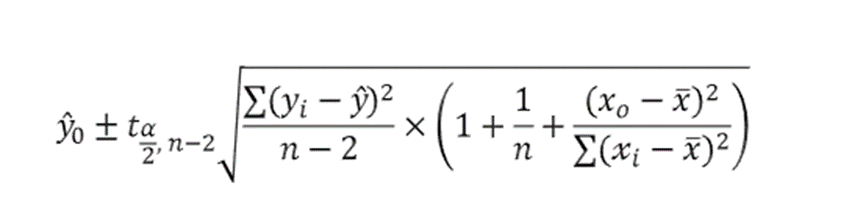

In [61]:
x0 = pd.DataFrame({'x':1200},index=[0])
p  = result.get_prediction(x0)
p.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,62.670533,1.559899,59.0734,66.267666,58.031225,67.309841


In [62]:

x = np.array([1095,1110,1086,1074,1098,1105,1163,1124,1088,1064])
y = np.array([53.655,57.72,52.128,52.626,54.9,56.355,58.15,57.324,53.312,51.072])

data = pd.DataFrame({'x':x,'y':y})

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data[['x']],data[['y']])
# lr.predict(data[['x']])
lr.predict(np.array([1200]).reshape(-1, 1))


array([[62.67053294]])

In [ ]:
lr.

In [11]:
data = pd.DataFrame({'x':x,'y':y})
data

,x,y
0,1095,53.655
1,1110,57.720
2,1086,52.128
3,1074,52.626
4,1098,54.900
5,1105,56.355
6,1163,58.150
7,1124,57.324
8,1088,53.312
9,1064,51.072


In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
dfX = sm.add_constant(x) # 절편 / 상수항 추가
model = sm.OLS(y, dfX)
results = model.fit()

print(results.params) # coef 확인
print(results.summary()) # coef, p-value, R^2

[-33.35765964   0.08002349]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     27.79
Date:                Tue, 24 May 2022   Prob (F-statistic):           0.000753
Time:                        14:47:56   Log-Likelihood:                -15.468
No. Observations:                  10   AIC:                             34.94
Df Residuals:                       8   BIC:                             35.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.3577   

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [61]:
result = results.get_prediction()

In [64]:
result.conf_int()

array([[53.32033854, 55.21579363],
       [54.48640637, 56.45043062],
       [52.48807515, 54.60763413],
       [51.27159116, 53.90355427],
       [53.57684032, 55.43943281],
       [54.12966647, 56.00693558],
       [57.34033833, 62.078989  ],
       [55.35443587, 57.82305895],
       [52.68028687, 54.73551639],
       [50.2034885 , 53.37118705]])

In [80]:
# results.predict(pd.DataFrame({'x':1200},index=[0]))
# # np.array([1200]).T

In [13]:
import statsmodels.formula.api as smf
result = smf.ols('y~x', data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     27.79
Date:                Tue, 24 May 2022   Prob (F-statistic):           0.000753
Time:                        14:48:02   Log-Likelihood:                -15.468
No. Observations:                  10   AIC:                             34.94
Df Residuals:                       8   BIC:                             35.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.3577     16.712     -1.996      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:

import numpy as np
import statsmodels.api as sm
import pandas as pd

x0 = pd.DataFrame({'x':1200},index=[0])
# x0 = 1200
# results.add_constant(pd.DataFrame({'x':1200},index=[0])) # 절편 / 상수항 추가
# results.predict(pd.DataFrame({'x':1200},index=[0]))
# # # np.array([1200]).T
# result.predict(x0)
# sm.tools.add_constant(pd.DataFrame(x0).T)
x0 = sm.tools.add_constant(pd.DataFrame(x0))
result.predict(x0)

0    62.670533
dtype: float64

In [21]:
p  = result.get_prediction(x0)
p.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,62.670533,1.559899,59.0734,66.267666,58.031225,67.309841


In [94]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'y ~ x'
lm = ols(formula, data).fit()
print(anova_lm(lm))

           df     sum_sq   mean_sq          F    PR(>F)
x         1.0  44.865380  44.86538  27.794022  0.000753
Residual  8.0  12.913678   1.61421        NaN       NaN
ERROR! Session/line number was not unique in database. History logging moved to new session 3066


# 맥네마르 검정(McNemar Test)

카이제곱 검정은 범주형 데이터자료에서 관찰된 빈도가 기대되는 빈도와 유의하게 다른지 검정하는 분석 방법이다.

그런데 만약에 데이터가 짝지어진, 같은 대상자로 부터 두번 측정한 자료라면 카이제곱 검정을 사용 하면 안된다.(독립이 아니므로)

즉 McNemar Test 검정은 2개의 대응된 (paired) 명목형 데이터의 2 X 2 분할표에서 행과 열의 주변 확률이 같은지 검정하는 방법

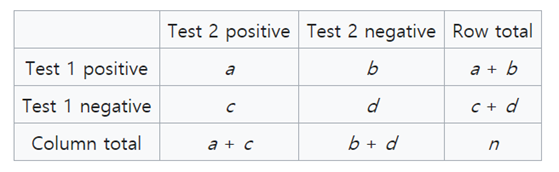

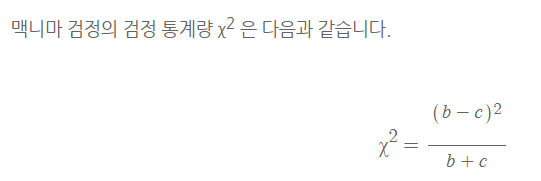

귀무가설 : $p_b = p_c$

대립가설 : $p_b \neq p_c$

만약 귀무가설이 참이라면, b = c 입니다

그렇게 되면, Test 1 negative와 Test 2 Negative가 동일해지고,

Test 1 positive와 Test 2 positive가 동일해집니다. 

따라서, 귀무가설을 기각한다는 것은 Test 1과 Test 2가 차이가 난다는 것을 의미합니다. 

그렇기 때문에 서로 다른 실험인 Test 1과 Test 2의 차이에 대한 검정을 할 수도 있고, 

동일한 실험인 Test 1과 Test 2 사이에 어떠한 처리를 함으로써 

"어떠한 처리"가 영향을 미쳤는지 확인하는데 사용할 수도 있습니다.

## 멕네마르 검정 가정

1. 표본이 대응 표본이다. (표본들이 독립이 아님.)

2. 아래의 빈도표 기준으로 b + c > 25이어야 한다. 


***
귀무가설 : 처치 전 양성 비율과 처치 후 양성 비율은 동일하다.

대립가설 : 처치 전 양성 비율과 처치 후 양성 비율은 동일하지 않다.

In [12]:
import pandas as pd
import numpy as np
'''
데이터를 보면 동일한 사람에게 전 , 후 결과를 얻었으므로 대응 표본임을 알 수 있다.
'''
df = pd.read_csv('./Mcnemar_test.csv')
df.head()

,before,after
0,1,0
1,1,1
2,1,1
3,0,1
4,1,0


In [14]:
'''
b + c > 25 보다 크기때문에 가정을 만족
'''
df_tab = pd.crosstab(index=df['before'], columns=df['after'])
df_tab

after,0,1
before,,
0,16,14
1,29,11


## McNemar 함수 사용법 
mcnemar(table, exact=True, correction=True) 

- table: A square contingency table
- exact: If exact is true, then the binomial distribution will be used. If exact is false, then the Chi-Square distribution will be used
- correction: If true, a continuity correction is used. As a rule of thumb, this correction is typically applied when any of the cell counts in the table are less than 5.

## McNemar's Test with no continuity correction( 연속 수정)

In [41]:
# 치료전 통증이 있는 사람의 비율
before_1 = df_tab.loc[1].sum() / len(df)

print('치료전 통증이 있는 사람의 비율: ', np.round(before_1 *100 ))

after_1 = df_tab[1].sum() / len(df)
print('치료후 통증이 있는 사람의 비율: ', np.round(after_1 *100 ))

from statsmodels.stats.contingency_tables import mcnemar

print(mcnemar(df_tab, exact=False, correction=False))

치료전 통증이 있는 사람의 비율:  57.0
치료후 통증이 있는 사람의 비율:  36.0
pvalue      0.022167905752988753
statistic   5.232558139534884


## McNemar's Test with continuity correction

In [40]:
from statsmodels.stats.contingency_tables import mcnemar

print(mcnemar(df_tab, exact=False,correction=True))

pvalue      0.032762645078859856
statistic   4.558139534883721


In [36]:
abs(14-29)**2 / (14+29)

5.232558139534884

In [39]:
(abs(14-29) -1)**2  / (14+29)

4.558139534883721

위에 보면 -1을 넣고 안넣고 차이다. 

연속 수정을 함으로써 조금 더 엄격한 검정을 하게 되고, 그 때문에 p-value가 조금 더 커졌습니다.

Pvalue 가 커졌다는거는 귀무가설을 기각시키기 더 어려워 진다.

즉 검정을 할때 더 엄격하게 한다. 왜냐 귀무가설을 더 채택하니깐..


## 검정 결과

p-value=0.022 이므로 귀무가설을 기각하여,

"처치 전 양성 비율과 처치 후 양성 비율은 동일하지 않다."인 대립가설을 채택하게 됩니다.

어떠한 처치는 양성 비율을 줄이는데 영향을 미친다.

## 멕네마르 두번째 예제

A대학에서는 새로운 강의 방법을 도입하고자 한다. 이를 위해 새로운 강의법과 기존의 강의법을 이용하여 한 달간 각각 수업을 실시한 후 무작위로 추출된 10명의 학생들에게 찬성(=1) 및 반대(=2) 의사를 물었다. 두 강의법에 대한 학생들의 찬반 의견이 일치하는가를 검정하라 

|학생|1|2|3|4|5|6|7|8|9|10|
|---|---|---|---|---|---|---|---|---|---|---|
|새 강의법|1|1|2|2|1|2|2|1|1|1|
|기존 강의법|2|2|1|1|2|1|1|2|2|2|

Ho : 찬반 의견은 일치한다.  
H1 : 찬반 의견은 일치하지 않는다.   

In [55]:
import pandas as pd
df = pd.DataFrame({"강의 종류": ["새 강의법","새 강의법","새 강의법","새 강의법","새 강의법",
"새 강의법","새 강의법","새 강의법","새 강의법","새 강의법","기존 강의법","기존 강의법","기존 강의법",
"기존 강의법","기존 강의법","기존 강의법","기존 강의법","기존 강의법","기존 강의법","기존 강의법"], 
                   "찬반":[1,1,2,2,1,2,2,1,1,1,2,2,1,1,2,1,1,2,2,2]})
df.head()

,강의 종류,찬반
0,새 강의법,1
1,새 강의법,1
2,새 강의법,2
3,새 강의법,2
4,새 강의법,1


In [56]:
df = pd.crosstab(index=df['강의 종류'], columns=df['찬반'])
df

찬반,1,2
강의 종류,,
기존 강의법,4,6
새 강의법,6,4


In [57]:
from statsmodels.stats.contingency_tables import mcnemar

print(mcnemar(df.values, exact=False))

pvalue      0.7728299926844475
statistic   0.08333333333333333


## exact McNemar test
맥니마 검정을 할때 가정중에 b+c > 25보다 커야 하는데.. 이보다 작을 때 사용하는것 같다.

In [58]:
df = pd.read_csv('./exact_Mcnemar_test.csv')
df.head()

,before,after
0,1,0
1,1,0
2,0,0
3,0,1
4,0,0


In [59]:
df_tab = pd.crosstab(index=df['before'], columns=df['after'])
df_tab

after,0,1
before,,
0,8,6
1,18,3


In [61]:
print(mcnemar(df_tab.values, exact=True))

pvalue      0.022655844688415527
statistic   6.0


## mlxtend을 이용한 McNemar's test 

mlxtend 패키지를 이용해서 멕네마르 검정을 수행 할 수 있다. 

빈도표를 만드는 방법을 잘 확인해 보자

예를들면 분류 모델을 수행 한 후에 모델1과 모델2의 두 예측 모델 사이에 유의미한 차이가 있는지 검정을 하려고 할때

아래와 같은 방법을 사용하면 된다.

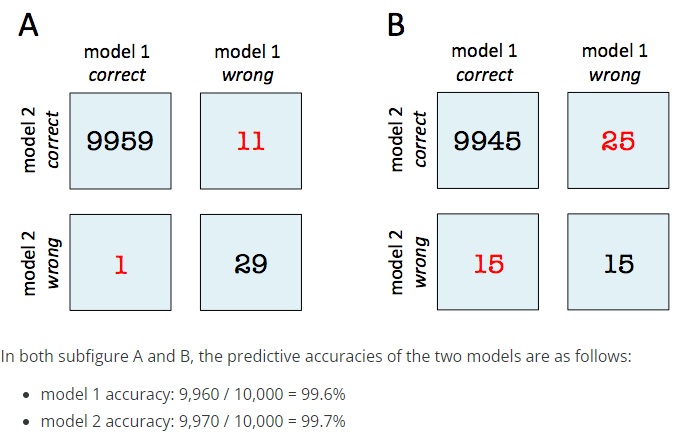

In [1]:
import numpy as np
from mlxtend.evaluate import mcnemar_table

# The correct target (class) labels
y_target = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Class labels predicted by model 1
y_model1 = np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

# Class labels predicted by model 2
y_model2 = np.array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)
print(tb)

[[4 2]
 [1 3]]


In [78]:
import numpy as np

tb_b = np.array([[9945, 25],
                 [15, 15]])

from mlxtend.evaluate import mcnemar

chi2, p = mcnemar(ary=tb_b, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)

chi-squared: 2.025
p-value: 0.15472892348537437


In [79]:
print(mcnemar(tb_b, corrected=True))

(2.025, 0.15472892348537437)


<font size="5"> 결론 </font>  
p-값이 가정된 유의성 임계값보다 크기 때문에(α = 0.05), 귀무 가설을 기각하고 두 예측 모델 사이에 유의미한 차이가 없다고 가정할 수 없습니다.

# 코크란 큐 검정(Cochran's Q test)

이항변수로 되어있는 3개 이상의 변수간 비율차이를 검정하는 방법이다.

Cochran의 Q 테스트는 여러 분류기를 평가하는 데 적용할 수 있는 McNemar 테스트의 일반화된 버전으로 간주할 수 있습니다.


## 코크란 큐 검정 예제1

K화장품 회사에서는 3가지 판매전략을 구사하고 있다. 이 판매전략들의 효과에 차이가 있는지를 조사하기 위해 판매사원 13명에게 판매시 사용하고 있는 판매전략에 대해 기입하도록 하였다. (1=판매성공, 2=판매실패) 판매전략 종류에 따라 판매효과에 차이가 있는지를 검정하라.

|학생|1|2|3|4|5|6|7|8|9|10|11|12|13|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|판매전략1|1|2|1|2|2|1|2|1|2|1|1|1|2|
|판매전략2|1|1|2|1|2|1|1|2|1|2|1|1|1|
|판매전략3|2|2|2|1|1|1|2|2|2|1|2|1|1|

Ho: 판매전략별 효과 차이가 없다.  
H1: 판매전략별 효과 차이가 있다. 

In [81]:
tb_b = np.array([[7, 6],
                 [9, 4],
                 [6, 7]])
tb_b


array([[7, 6],
       [9, 4],
       [6, 7]])

In [84]:
from statsmodels.stats.contingency_tables import cochrans_q

print(cochrans_q(tb_b))

df          1
pvalue      0.31731050786291115
statistic   1.0


## 코크란 큐 검정 예제2(mlxtend 패키지 사용)

귀무가설 : 분류 정확도 간에 차이가 없다.

연구가설 : 분류 정확도 간에 차이가 있다.

In [1]:
import numpy as np
from mlxtend.evaluate import cochrans_q
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar

y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0])

y_model_1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0])

y_model_2 = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0])

y_model_3 = np.array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1])

In [64]:
q, p_value = cochrans_q(y_true, 
                        y_model_1, 
                        y_model_2, 
                        y_model_3)

print('Q: %.3f' % q)
print('p-value: %.3f' % p_value)

Q: 7.529
p-value: 0.023


p-값이 다음보다 작기 때문에α, 귀무 가설을 기각하고 분류 정확도 간에 차이가 있다는 결론을 내릴 수 있습니다.